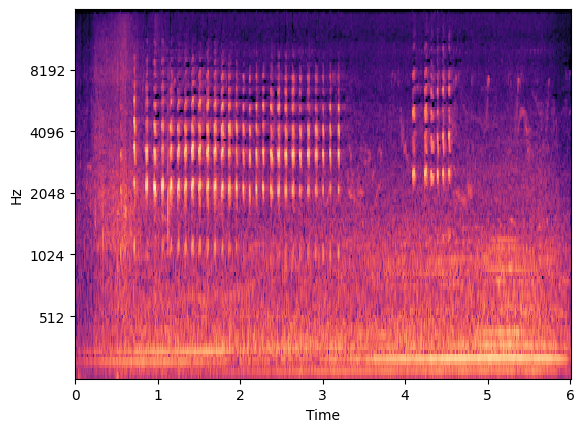

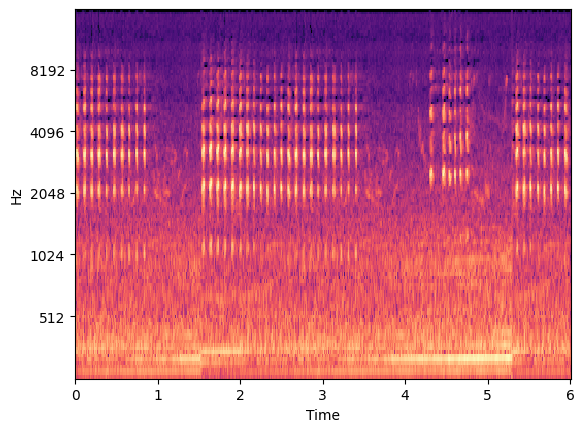

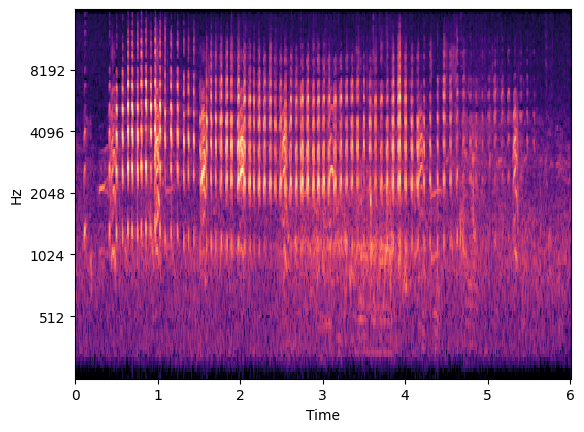

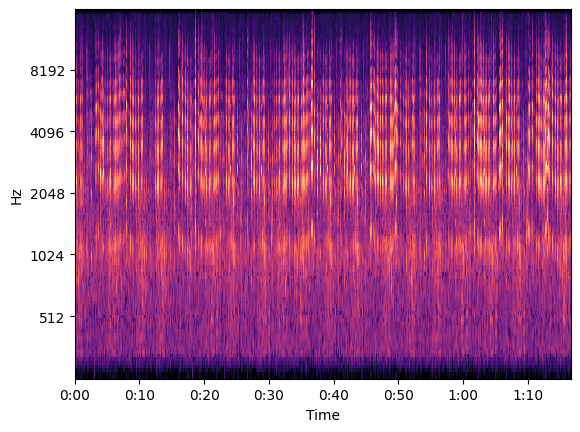

In [6]:
#import tensorflow as tf
import numpy as np
#import scipy as sp
#import sklearn as skl
import matplotlib.pyplot as plt
import pandas as pd
#import pickle
#import math
import os
import glob
import librosa as lba
import librosa.display as lid
import soundfile as sf
import random
from pathlib import Path
from tensorflow import keras
#from keras import layers
#from keras import models
#from keras import regularizers
#from sklearn.model_selection import train_test_split
#from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score
from datetime import datetime#, date, timedelta
from numpy.random import default_rng
#from keras.layers import Dense, Concatenate, Input, Lambda
#from keras.models import Model

WORKING_DIRECTORY = 'C:/BirdCLEF23/'
os.chdir (WORKING_DIRECTORY)

DIR_DATA = "C:/BirdCLEF23/data"
SR = 32000
SEED = 2276
rng = default_rng (SEED)
np.random.seed (SEED)
random.seed (SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)


fpLog  = Path ('./logs/log lotlap1.txt')

with open (fpLog, 'w') as flog:
    print ('lotlap1.ipynb has started at : ', datetime.now(), file = flog)

BIRD = 'lotlap1'
DIR_AUDIO = './data/train_audio/'
DIR_SAMPLE = './config 264b v2.0/rare/lotlap1/'
lini = [fname.replace ('\\', '/').replace ('//', '/') for fname in glob.glob (f'{DIR_AUDIO}/{BIRD}/*.*')]

# lotlap1/XC213636.ogg
#---------------------------------------------------------------
fname = f'{DIR_AUDIO}/lotlap1/XC213636.ogg'
nax, _ = lba.load (fname, sr = SR, res_type = "kaiser_fast", mono = True)
nax = nax[int (0.5*SR) : int (6.5*SR)]

spec = lba.feature.melspectrogram (y = nax, sr=SR, n_mels = 128, n_fft = 1024, hop_length = 400, fmax = 16000, fmin = 20)
spec = lba.power_to_db (spec, ref = np.max)
lid.specshow (spec, sr = SR, hop_length = 400, n_fft = 1024, fmin = 20, fmax = 16000, x_axis = 'time', y_axis = 'mel')
plt.show()

# enlarging the initial audio to 1 min

f00 = f'{DIR_SAMPLE}/XC213636M0.wav'

lnax = []
for i in range (20):
    duration = rng.integers (int (2*SR), int (4.5*SR))
    start = rng.integers (0, nax.shape[0] - duration)
    _nax_ = nax [start : start + duration]
    lnax.append (_nax_)

_nax_ = np.concatenate (lnax)

_spec_ = lba.feature.melspectrogram (y = _nax_[30*SR : 36*SR], sr=SR, n_mels = 128, n_fft = 1024, hop_length = 400, fmax = 16000, fmin = 20)
_spec_ = lba.power_to_db (_spec_, ref = np.max)
lid.specshow (_spec_, sr = SR, hop_length = 400, n_fft = 1024, fmin = 20, fmax = 16000, x_axis = 'time', y_axis = 'mel')
plt.show()

sf.write (f00, _nax_, SR)
#---------------------------------------------------------------

# lotlap1/XC584683.ogg
#---------------------------------------------------------------
fname = f'{DIR_AUDIO}/lotlap1/XC584683.ogg'
nax, _ = lba.load (fname, sr = SR, res_type = "kaiser_fast", mono = True)
nax = nax[int (0.5*SR) : int (6.5*SR)]

spec = lba.feature.melspectrogram (y = nax, sr=SR, n_mels = 128, n_fft = 1024, hop_length = 400, fmax = 16000, fmin = 20)
spec = lba.power_to_db (spec, ref = np.max)
lid.specshow (spec, sr = SR, hop_length = 400, n_fft = 1024, fmin = 20, fmax = 16000, x_axis = 'time', y_axis = 'mel')
plt.show()

# enlarging the initial audio to 1 min

f00 = f'{DIR_SAMPLE}/XC584683M0.wav'

lnax = []
for i in range (20):
    duration = rng.integers (int (2*SR), int (5*SR))
    start = rng.integers (0, nax.shape[0] - duration)
    _nax_ = nax [start : start + duration]
    lnax.append (_nax_)

_nax_ = np.concatenate (lnax)

_spec_ = lba.feature.melspectrogram (y = _nax_, sr=SR, n_mels = 128, n_fft = 1024, hop_length = 400, fmax = 16000, fmin = 20)
_spec_ = lba.power_to_db (_spec_, ref = np.max)
lid.specshow (_spec_, sr = SR, hop_length = 400, n_fft = 1024, fmin = 20, fmax = 16000, x_axis = 'time', y_axis = 'mel')
plt.show()

sf.write (f00, _nax_, SR)

with open (fpLog, 'a') as flog:
    print ('lotlap1.ipynb has finished at : ', datetime.now(), file = flog)
